# WASHINGTON STATE HOME LOANS 2016 - Data Story

Purpose is to look for - 
1. Factors affecting loan approval decisions? 
2. Is there any area, ethinicity or gender bias?
3. Are there any trends in the data?

## Import the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pathToSaveDF = 'E:/Data Science/SpringBoard DS/Capstone Project 1/Code/Dataset/washington-state-home-mortgage-hdma2016/Washington_State_HDMA-2016-cleaned.csv'

In [3]:
#Load CSV to dataframe
WA_HomeLoan_df_cleaned = pd.read_csv(pathToSaveDF, low_memory=True)

In [4]:
# print dataset head
pd.set_option('display.max_columns', 50)
WA_HomeLoan_df_cleaned.head()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,msamd_name,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_ethnicity_name,agency_name,action_taken_name
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Male,Not Hispanic or Latino,413.27,2016,0,Female,Not Hispanic or Latino,Consumer Financial Protection Bureau,Loan originated
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Walla Walla - WA,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,9208.01,2016,0,Male,Hispanic or Latino,Department of Housing and Urban Development,Loan originated
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,Not Hispanic or Latino,414.00,2016,0,Male,Not Hispanic or Latino,Department of Housing and Urban Development,Loan originated
3,146.169998,5032.0,8.590000,1525.0,1820.0,351,73300.0,216.5,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,"Information not provided by applicant in mail,...",405.10,2016,0,Male,"Information not provided by applicant in mail,...",National Credit Union Administration,Loan originated
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Bremerton, Silverdale - WA",Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,Kitsap County,Male,Not Hispanic or Latino,907.00,2016,0,Female,Not Hispanic or Latino,Federal Deposit Insurance Corporation,Loan originated


# Analyse Trends

### Number of applicants per Metropolitan Area

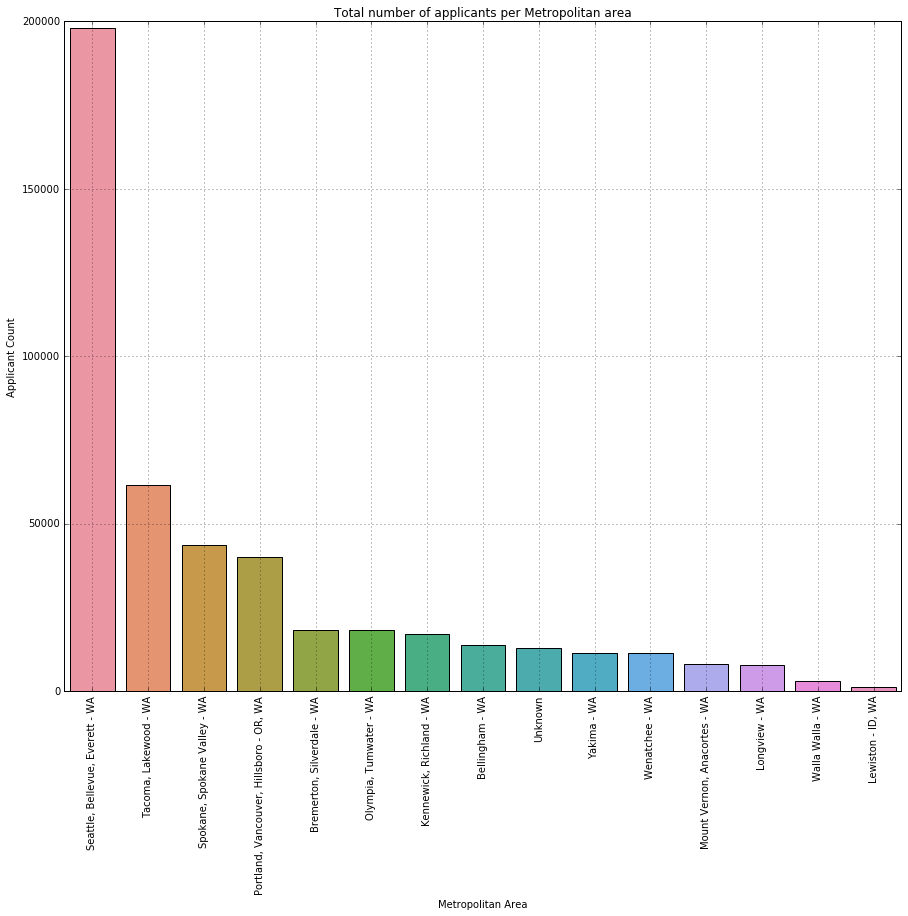

In [5]:
%matplotlib inline
plt.subplots(figsize=(15,12))
ax = sns.barplot(y=WA_HomeLoan_df_cleaned.msamd_name.value_counts(), 
            x=WA_HomeLoan_df_cleaned.msamd_name.value_counts().index, 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
#plt.xticks(np.arange(0, 200000, 10000))
plt.title('Total number of applicants per Metropolitan area')
plt.xlabel('Metropolitan Area')
plt.ylabel('Applicant Count')
plt.grid()
plt.show()

Seattle-Bellevue-Everett Metropolitan area has most number of applicants. Further investigation needs to be done if family median income and applicant income across all the Metropolitan areas, to examine the high volume of applications.

### Family Median Income per Metropolitan Area

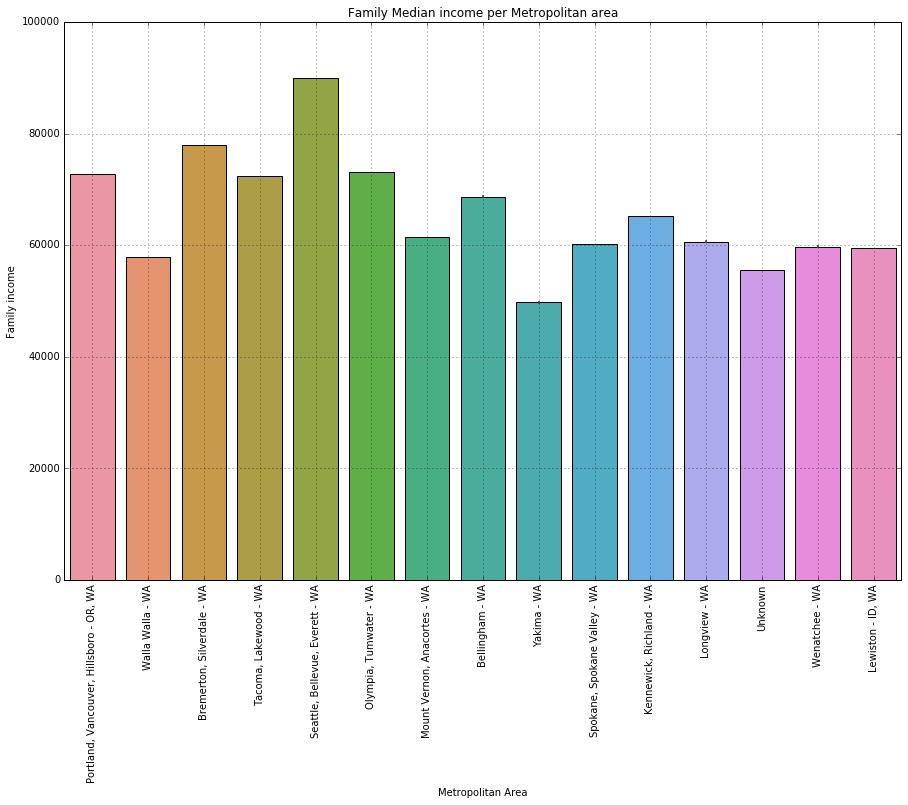

In [6]:
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(y=WA_HomeLoan_df_cleaned.hud_median_family_income, 
            x=WA_HomeLoan_df_cleaned.msamd_name, 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.title('Family Median income per Metropolitan area')
plt.xlabel('Metropolitan Area')
plt.ylabel('Family income')
plt.grid()
plt.show()

Though Seattle-Bellevue-Everett Metropolitan area has the highest family median income, but doesn't significantly differ as compared to high volume of applications.

### Applicant Income per Metropolitan Area

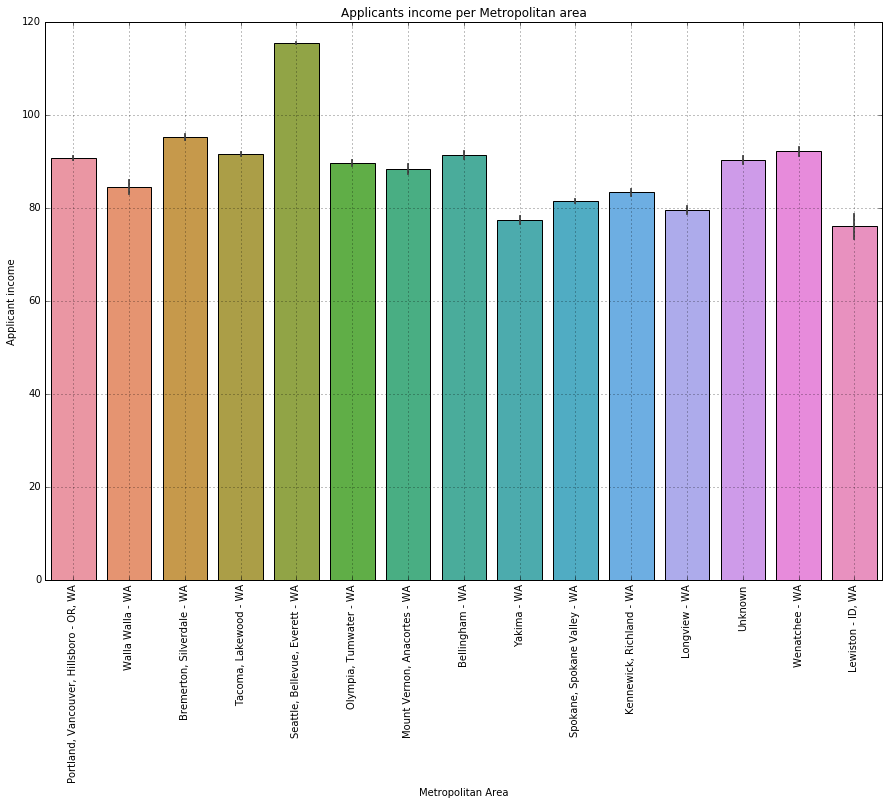

In [7]:
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(y=WA_HomeLoan_df_cleaned.applicant_income_000s, 
            x=WA_HomeLoan_df_cleaned.msamd_name, 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.title('Applicants income per Metropolitan area')
plt.xlabel('Metropolitan Area')
plt.ylabel('Applicant income')
plt.grid()
plt.show()

There seems to be marginal high applicant income in Seattle-Bellevue-Everett Metropolitan area, but doesn't significantly differ as compared to high volume of applications. Further investigation needs to be done if there is a significant increase in population levels across metropolitan areas for significant higher volumes.

### Population Per Metropolitan Area

In [8]:
# Group by Metropolitan Area and count population
population_msamd = WA_HomeLoan_df_cleaned.groupby(by = ['msamd_name'])['population'].count()

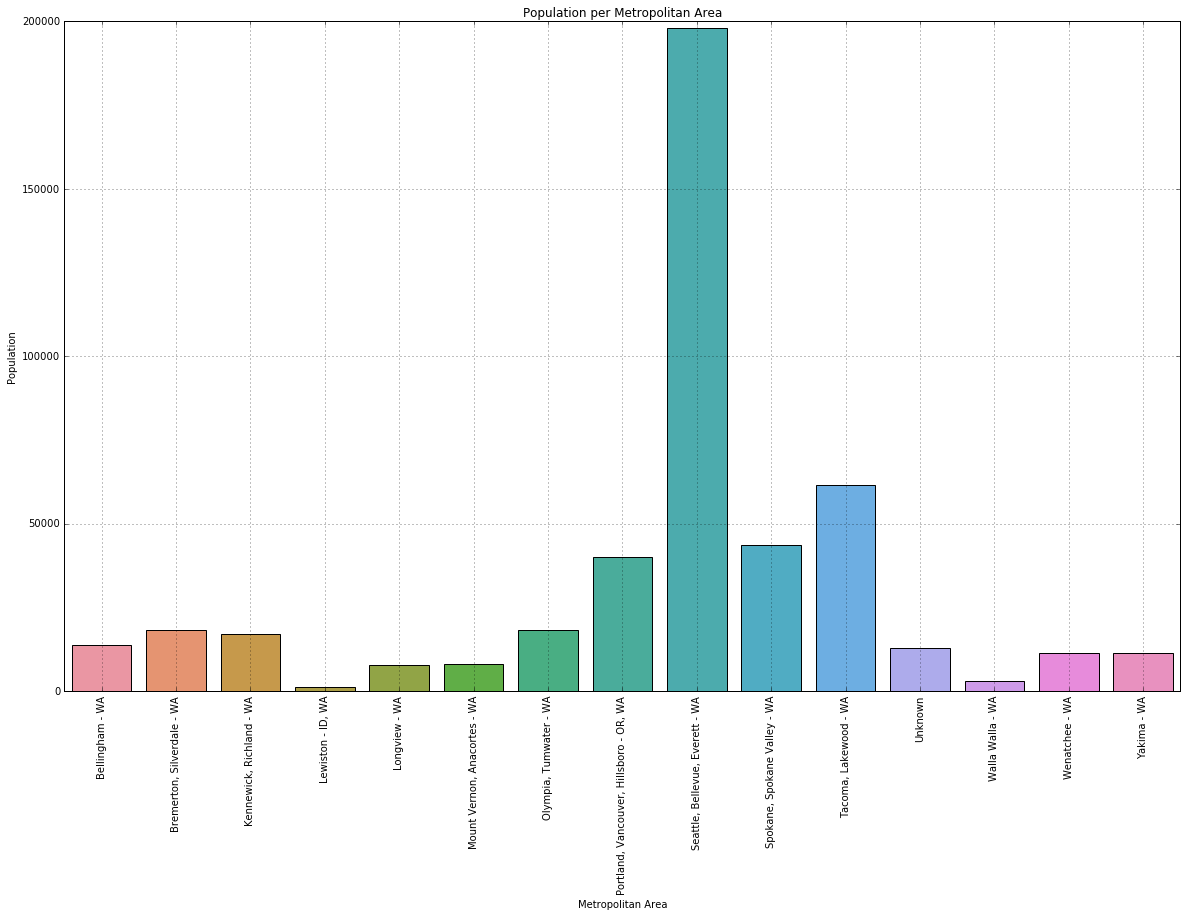

In [9]:
%matplotlib inline
plt.subplots(figsize=(20,12))
sns.barplot(x=population_msamd.index, 
            y=population_msamd.values)
plt.xticks(rotation='vertical')
plt.title('Population per Metropolitan Area')
plt.xlabel('Metropolitan Area')
plt.ylabel('Population')
plt.grid()
plt.show()

Seattle-Bellevue-Everett Metropolitan area is the most populated area with high income levels.

### Occupany across Metropolitan Areas

In [10]:
#Dataframe for counting type of occupancy per Metropolitan Area
ownerOccup_msamdName_groupby = WA_HomeLoan_df_cleaned.groupby(by = ['msamd_name', 
                                                                    'owner_occupancy_name'])['msamd_name',
                                                                                             'owner_occupancy_name'].count()

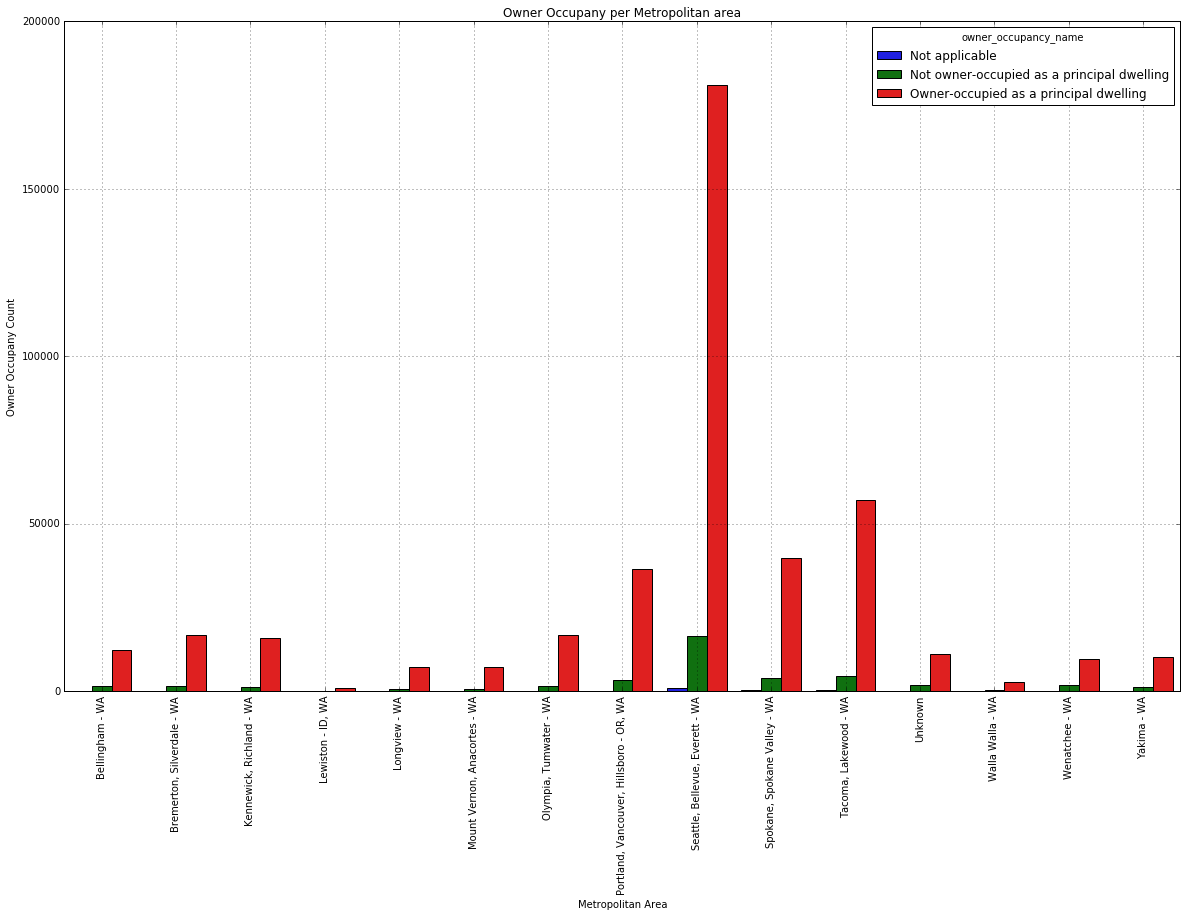

In [11]:
%matplotlib inline
plt.subplots(figsize=(20,12))
sns.barplot(y=ownerOccup_msamdName_groupby.msamd_name, 
            x=ownerOccup_msamdName_groupby.index.get_level_values('msamd_name'), 
            hue=ownerOccup_msamdName_groupby.index.get_level_values('owner_occupancy_name'), 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.title('Owner Occupany per Metropolitan area')
plt.xlabel('Metropolitan Area')
plt.ylabel('Owner Occupany Count')
plt.grid()
plt.show()

Mostly homes are used for primary occupancy. Further analysis needs to be done on type of loans and loan purpose.

### Number of 1 to 4 family units across Metropolitan Areas

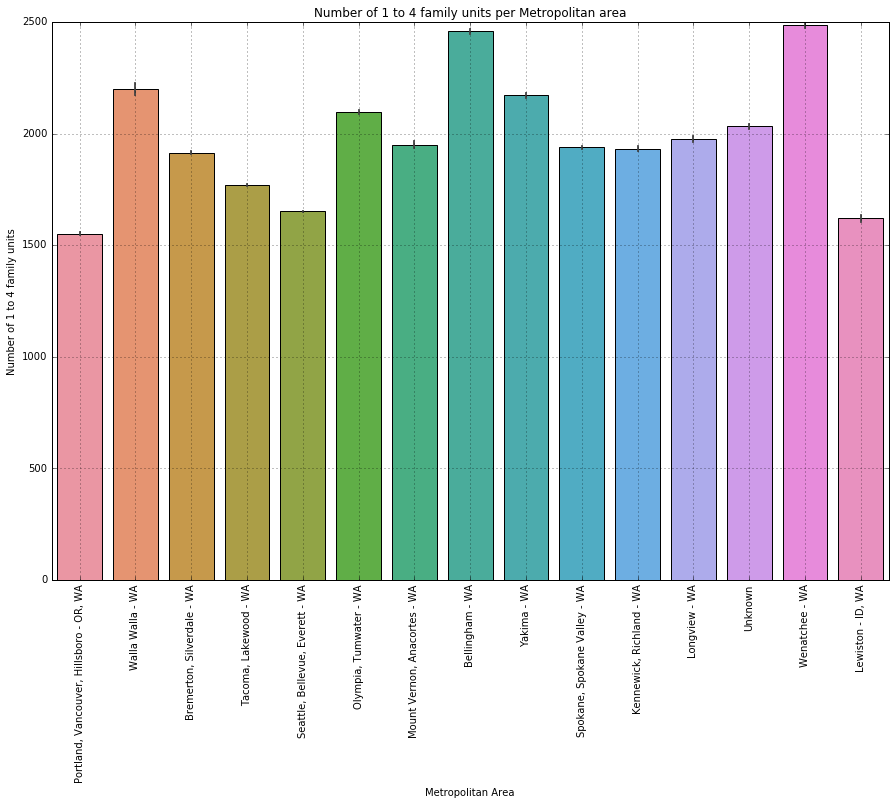

In [12]:
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(y=WA_HomeLoan_df_cleaned.number_of_1_to_4_family_units, 
            x=WA_HomeLoan_df_cleaned.msamd_name, 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.title('Number of 1 to 4 family units per Metropolitan area')
plt.xlabel('Metropolitan Area')
plt.ylabel('Number of 1 to 4 family units')
plt.grid()
plt.show()

Type of unit doesn't have any effect on the number of applicants per Metropolitian Area.

#### Applicants Loan purpose

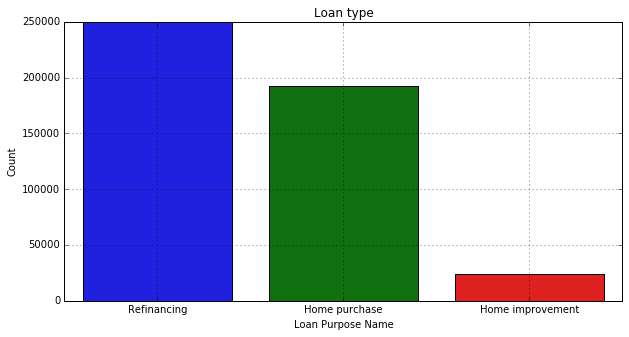

In [13]:
%matplotlib inline
plt.subplots(figsize=(10,5))
sns.barplot(x=WA_HomeLoan_df_cleaned.loan_purpose_name.value_counts().index, 
            y=WA_HomeLoan_df_cleaned.loan_purpose_name.value_counts(), 
            data=WA_HomeLoan_df_cleaned)
plt.title('Loan type')
plt.ylabel('Count')
plt.xlabel('Loan Purpose Name')
plt.grid()
plt.show()

#### Applicants Loan Type

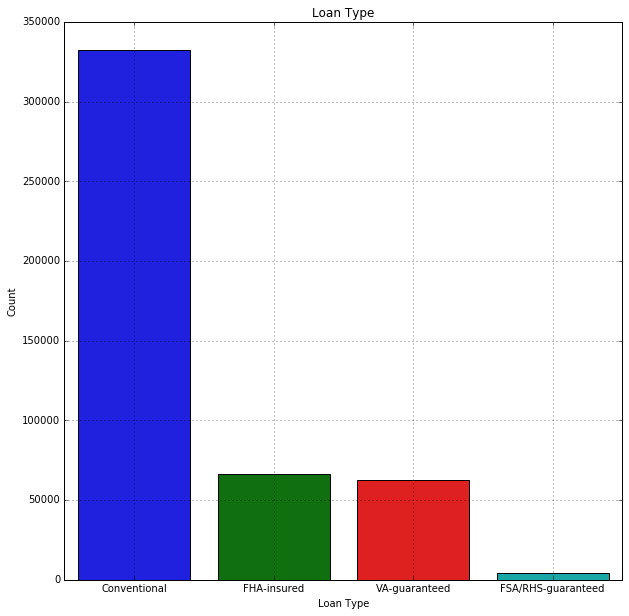

In [14]:
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.barplot(x=WA_HomeLoan_df_cleaned.loan_type_name.value_counts().index, 
            y=WA_HomeLoan_df_cleaned.loan_type_name.value_counts(), 
            data=WA_HomeLoan_df_cleaned)
plt.title('Loan Type')
plt.ylabel('Count')
plt.xlabel('Loan Type')
plt.grid()
plt.show()

#### Loan Purpose based on Ethnicity

In [15]:
# Group by Loan Purpose and Applicant Ethnicity
loantype_appEthnicName_groupby = WA_HomeLoan_df_cleaned.groupby(by = ['loan_purpose_name', 
                                                                      'applicant_ethnicity_name'])['loan_purpose_name', 
                                                                                                   'applicant_ethnicity_name'].count()

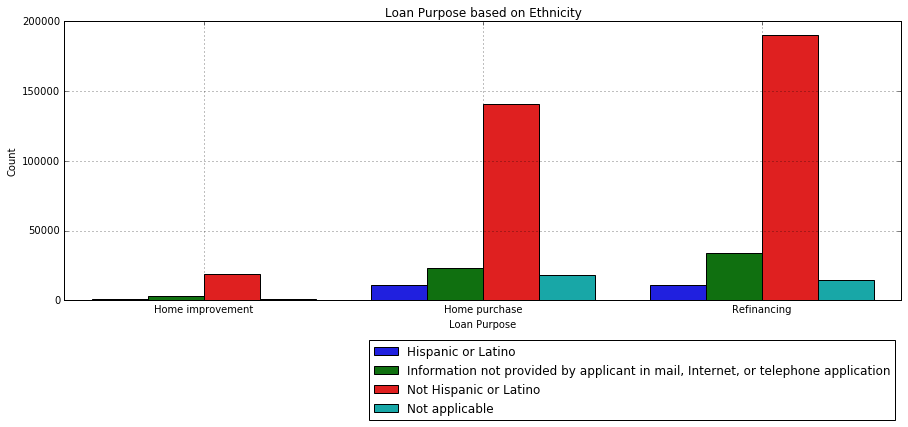

In [16]:
%matplotlib inline
plt.subplots(figsize=(15,5))
sns.barplot(x=loantype_appEthnicName_groupby.index.get_level_values('loan_purpose_name'), 
            y=loantype_appEthnicName_groupby.loan_purpose_name, 
            hue=loantype_appEthnicName_groupby.index.get_level_values('applicant_ethnicity_name'), 
            data=WA_HomeLoan_df_cleaned)
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.45))
plt.title('Loan Purpose based on Ethnicity')
plt.ylabel('Count')
plt.xlabel('Loan Purpose')
plt.grid()
plt.show()
plt.show()

#### Loan Purpose based on Gender

In [17]:
# Group by Loan Purpose and Applicant Ethnicity
loantype_appsex_groupby = WA_HomeLoan_df_cleaned.groupby(by = ['loan_purpose_name', 
                                                                      'applicant_sex_name'])['loan_purpose_name', 
                                                                                                   'applicant_sex_name'].count()

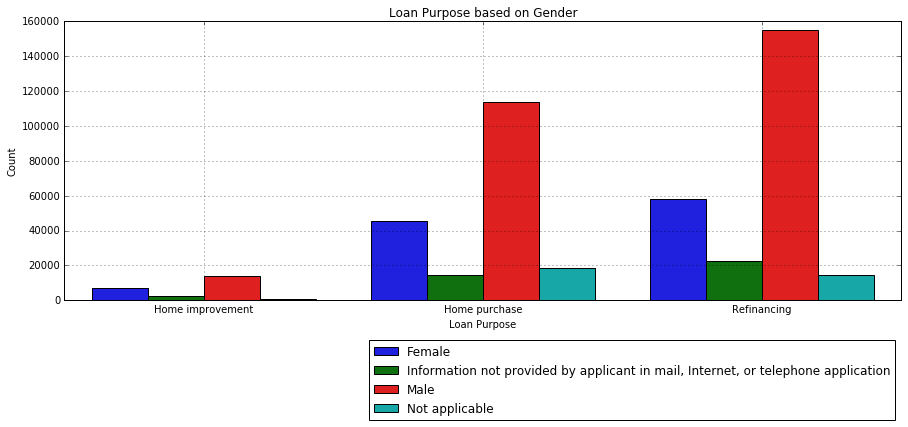

In [18]:
%matplotlib inline
plt.subplots(figsize=(15,5))
sns.barplot(x=loantype_appsex_groupby.index.get_level_values('loan_purpose_name'), 
            y=loantype_appsex_groupby.loan_purpose_name, 
            hue=loantype_appsex_groupby.index.get_level_values('applicant_sex_name'), 
            data=WA_HomeLoan_df_cleaned)
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.45))
plt.title('Loan Purpose based on Gender')
plt.ylabel('Count')
plt.xlabel('Loan Purpose')
plt.grid()
plt.show()
plt.show()

# Actions Taken Trends

#### Count of Action Taken

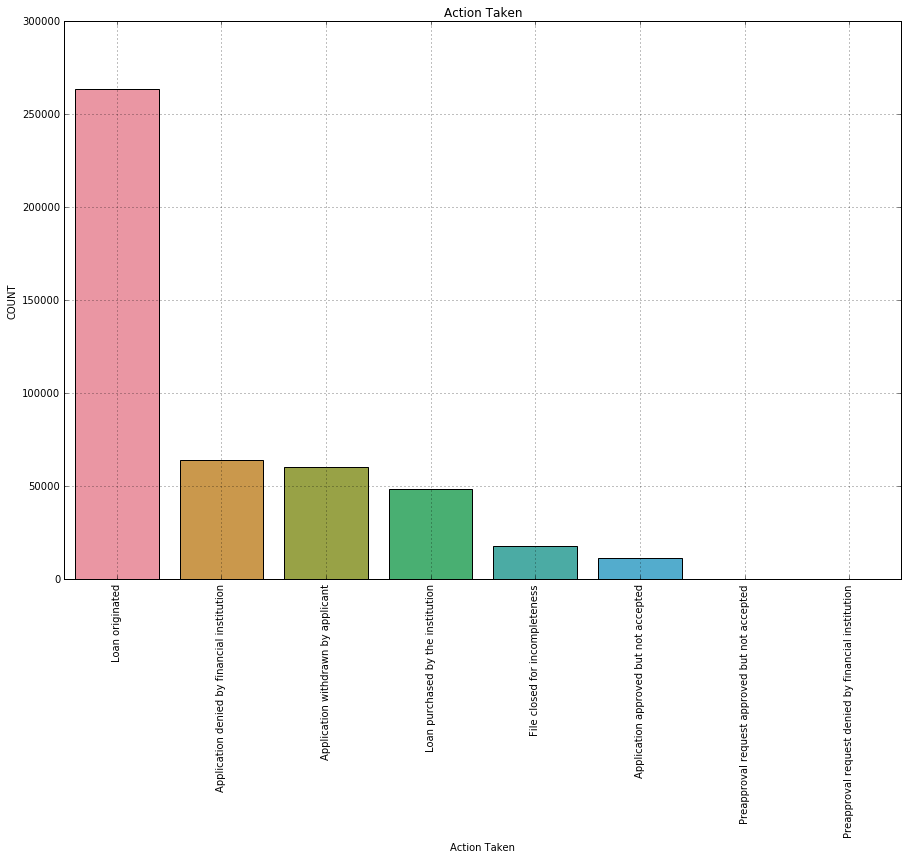

In [19]:
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(x=WA_HomeLoan_df_cleaned.action_taken_name.value_counts().index, 
            y=WA_HomeLoan_df_cleaned.action_taken_name.value_counts(), 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.title('Action Taken')
plt.ylabel('COUNT')
plt.xlabel('Action Taken')
plt.grid()
plt.show()

#### Ethnicity bias for Action taken

In [20]:
# Group by Action taken and gender bias
actTaken_appEthncName_group = WA_HomeLoan_df_cleaned.groupby(by = ['action_taken_name', 
                                                                   'applicant_ethnicity_name'])['applicant_ethnicity_name',
                                                                                            'action_taken_name'].count()

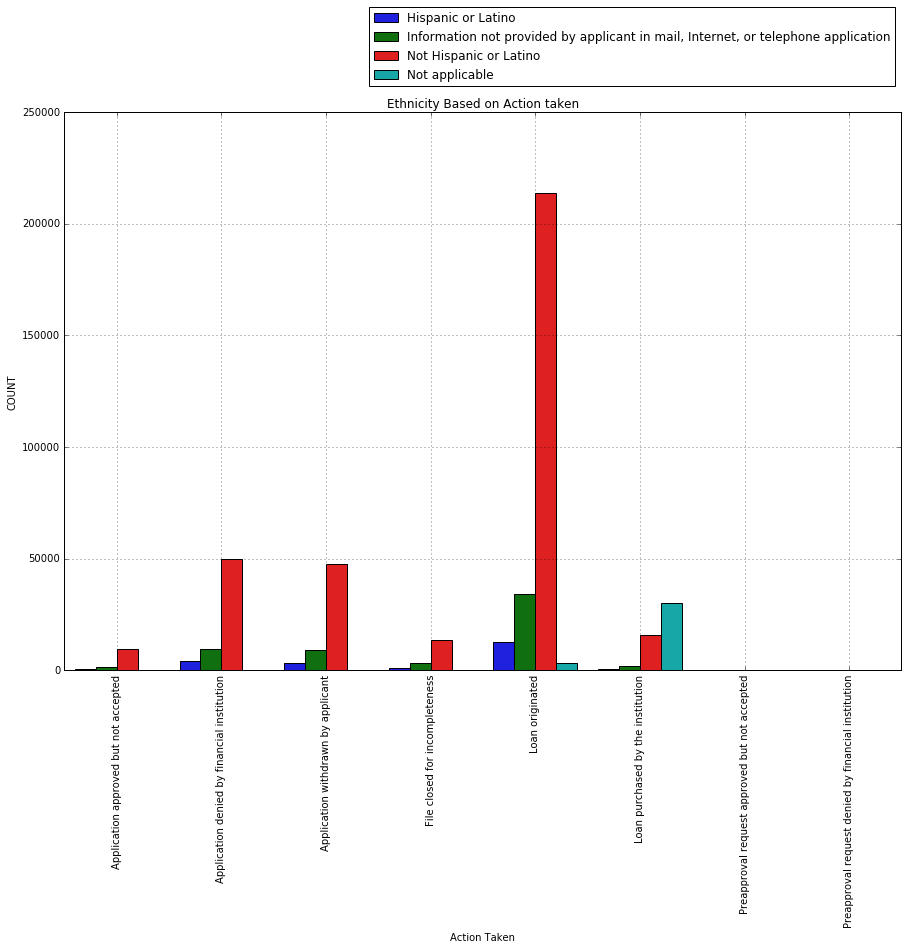

In [21]:
 %matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(x=actTaken_appEthncName_group.index.get_level_values('action_taken_name'), 
            y=actTaken_appEthncName_group.action_taken_name, 
            hue=actTaken_appEthncName_group.index.get_level_values('applicant_ethnicity_name'), 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
#plt.legend(loc='upper left')
plt.title('Ethnicity Based on Action taken')
plt.ylabel('COUNT')
plt.xlabel('Action Taken')
plt.grid()
plt.show()

Most of the applicants are non-hispanic or Latino. Further analysis needs to be done if there is a racial bias.

#### Gender bias for Action taken

In [22]:
# Group by action taken and applicant sex
actTaken_appgender_group = WA_HomeLoan_df_cleaned.groupby(by = ['action_taken_name', 
                                                                   'applicant_sex_name'])['action_taken_name',
                                                                                            'applicant_sex_name'].count()

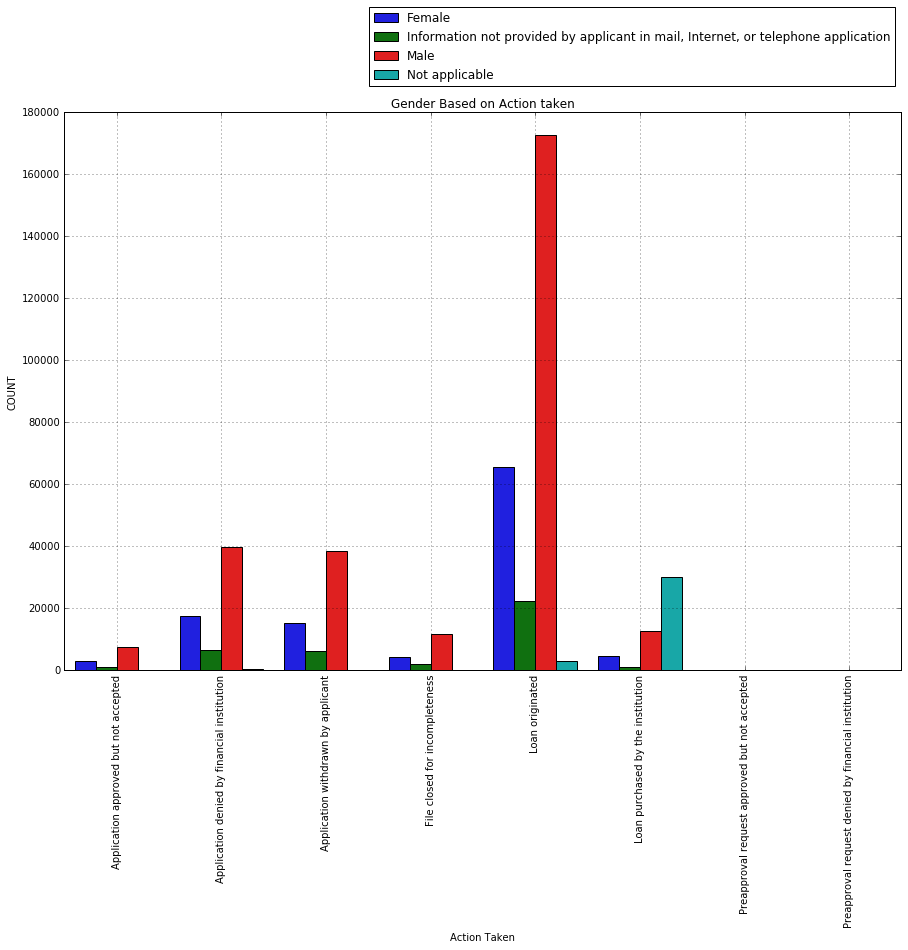

In [23]:
 %matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(x=actTaken_appgender_group.index.get_level_values('action_taken_name'), 
            y=actTaken_appgender_group.action_taken_name, 
            hue=actTaken_appgender_group.index.get_level_values('applicant_sex_name'), 
            data=WA_HomeLoan_df_cleaned)
plt.xticks(rotation='vertical')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.2))
plt.title('Gender Based on Action taken')
plt.ylabel('COUNT')
plt.xlabel('Action Taken')
plt.grid()
plt.show()

Most of the applicants are Male. Further analysis needs to be done if there is a gender bias.

#### Action taken across Metropolitan Areas

In [24]:
# Group by action taken and msamd_name
actTaken_msamdName_group = WA_HomeLoan_df_cleaned.groupby(by = ['action_taken_name', 'msamd_name'])['msamd_name',
                                                                                            'action_taken_name'].count()

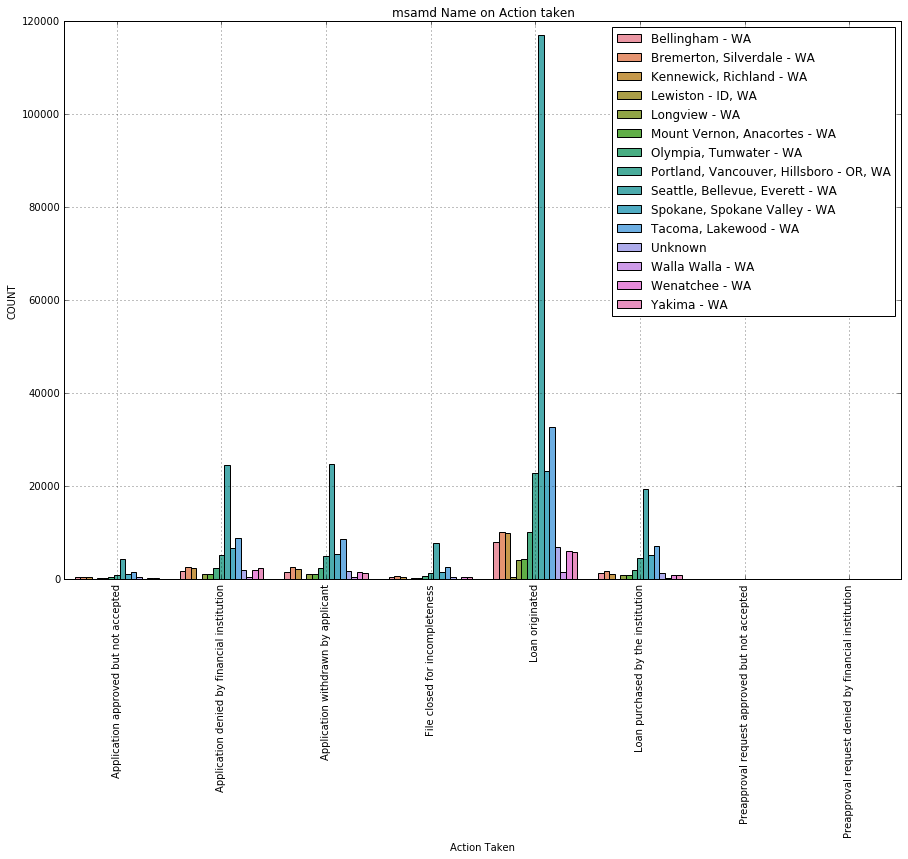

In [25]:
 %matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(x=actTaken_msamdName_group.index.get_level_values('action_taken_name'), 
            y=actTaken_msamdName_group.action_taken_name, 
            hue=actTaken_msamdName_group.index.get_level_values('msamd_name'), 
            data=WA_HomeLoan_df_cleaned)
#plt.xticks(np.arange(0, 2500, 100))
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.title('msamd Name on Action taken')
plt.ylabel('COUNT')
plt.xlabel('Action Taken')
plt.grid()
plt.show()

Seattle-Bellevue-Everett has the highest loan approval rate compared with other Metopolitan area. Further investigation is required to check if there is a bias.

#### Action taken based on loan purpose

In [26]:
# Group by action taken and loan purpose
actTaken_loanPur_group = WA_HomeLoan_df_cleaned.groupby(by = ['action_taken_name', 'loan_purpose_name'])['loan_purpose_name',
                                                                                            'action_taken_name'].count()

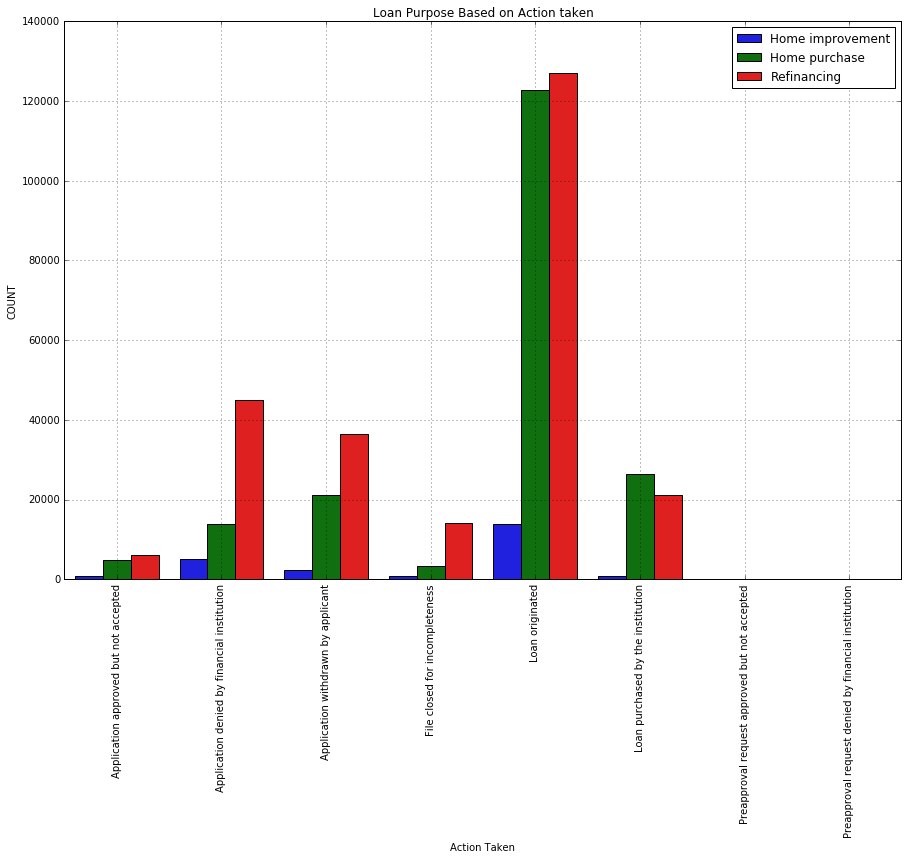

In [27]:
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(x=actTaken_loanPur_group.index.get_level_values('action_taken_name'), 
            y=actTaken_loanPur_group.action_taken_name, 
            hue=actTaken_loanPur_group.index.get_level_values('loan_purpose_name'), 
            data=WA_HomeLoan_df_cleaned)
#plt.xticks(np.arange(0, 2500, 100))
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.title('Loan Purpose Based on Action taken')
plt.ylabel('COUNT')
plt.xlabel('Action Taken')
plt.grid()
plt.show()

Most of the loans are either Home purchase and Refinancing

#### Action Taken for Loan Type

In [28]:
# Group by action taken and loan type
actTaken_loantype_group = WA_HomeLoan_df_cleaned.groupby(by = ['action_taken_name', 'loan_type_name'])['loan_type_name',
                                                                                            'action_taken_name'].count()

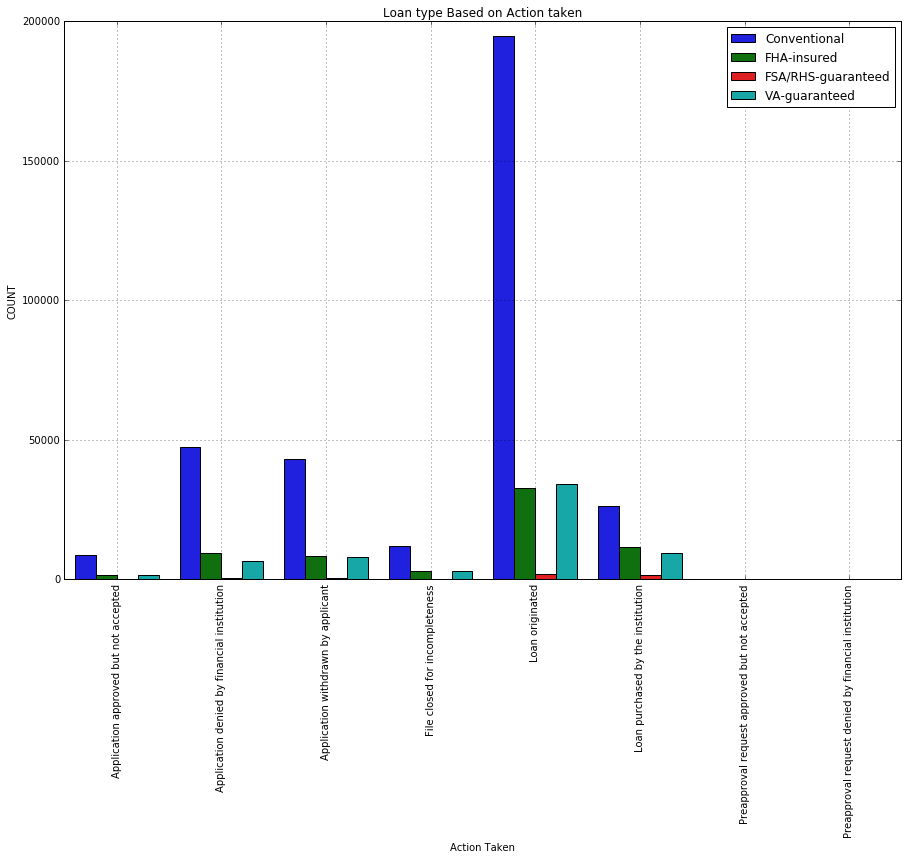

In [29]:
%matplotlib inline
plt.subplots(figsize=(15,10))
sns.barplot(x=actTaken_loantype_group.index.get_level_values('action_taken_name'), 
            y=actTaken_loantype_group.action_taken_name, 
            hue=actTaken_loantype_group.index.get_level_values('loan_type_name'), 
            data=WA_HomeLoan_df_cleaned)
#plt.xticks(np.arange(0, 2500, 100))
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.title('Loan type Based on Action taken')
plt.ylabel('COUNT')
plt.xlabel('Action Taken')
plt.grid()
plt.show()

Most of the loans are conventional 

#### Distibution of Loan Amount per Metropolitan Area

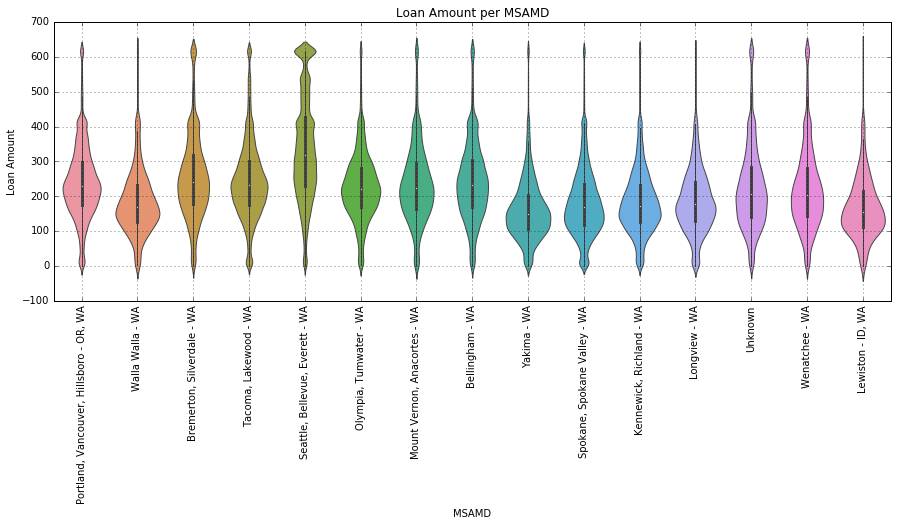

In [30]:
%matplotlib inline
plt.subplots(figsize=(15,5))
sns.violinplot(y=WA_HomeLoan_df_cleaned.loan_amount_000s, 
              x=WA_HomeLoan_df_cleaned.msamd_name, data=WA_HomeLoan_df_cleaned)
#plt.xticks(np.arange(0, 2500, 100))
plt.xticks(rotation='vertical')
plt.title('Loan Amount per MSAMD')
plt.xlabel('MSAMD')
plt.ylabel('Loan Amount')
plt.grid()
plt.show()

#### Distibution of Loan amount across Loan Purpose

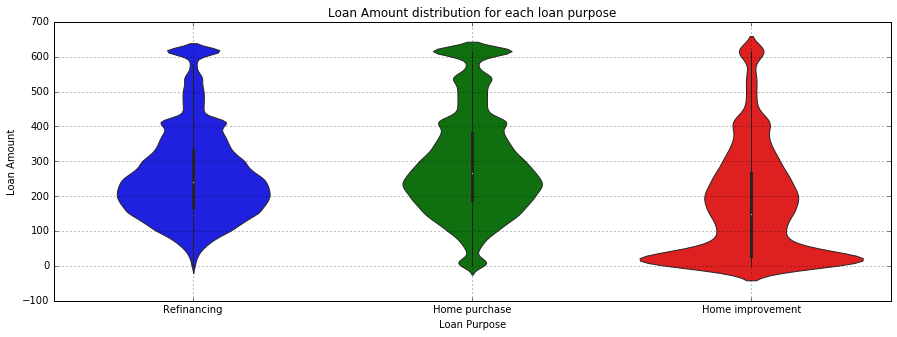

In [31]:
%matplotlib inline
plt.subplots(figsize=(15,5))
sns.violinplot(x=WA_HomeLoan_df_cleaned.loan_purpose_name, 
              y=WA_HomeLoan_df_cleaned.loan_amount_000s, data=WA_HomeLoan_df_cleaned)
#plt.xticks(np.arange(0, 2500, 100))
plt.title('Loan Amount distribution for each loan purpose')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.grid()
plt.show()

#### Distibution of Loan amount across Loan Type for each Action taken

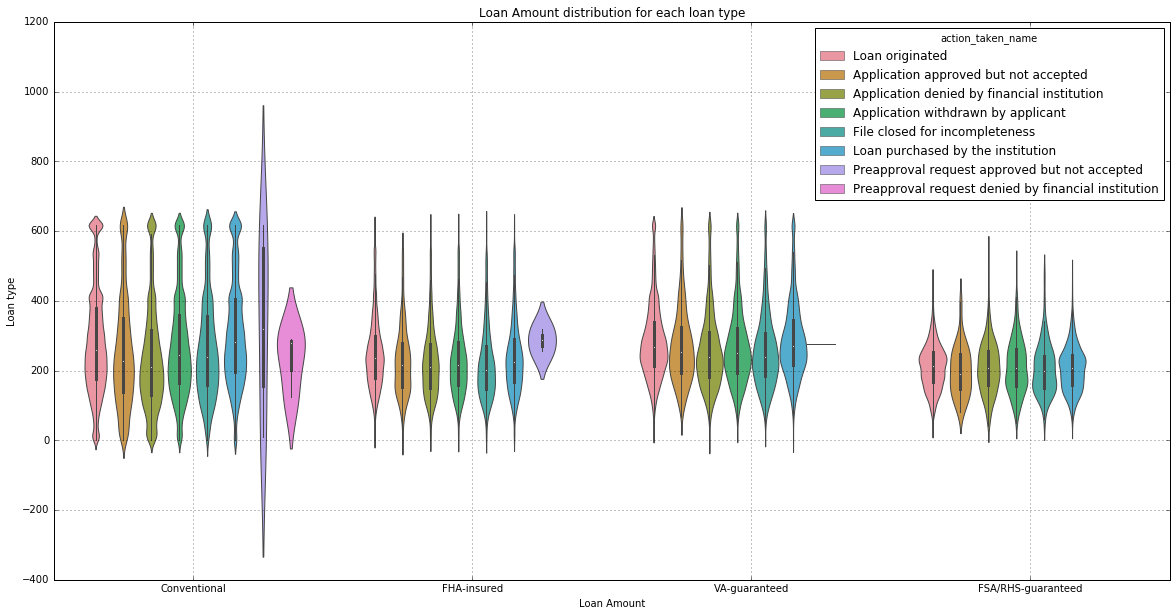

In [32]:
%matplotlib inline
plt.subplots(figsize=(20,10))
sns.violinplot(x=WA_HomeLoan_df_cleaned.loan_type_name, 
              y=WA_HomeLoan_df_cleaned.loan_amount_000s, hue=WA_HomeLoan_df_cleaned.action_taken_name, data=WA_HomeLoan_df_cleaned)
plt.title('Loan Amount distribution for each loan type')
plt.ylabel('Loan type')
plt.xlabel('Loan Amount')
plt.grid()
plt.show()

# Conclusion

Seattle-Bellevue-Everett Metropolitan area trends-
    1.	Has largest population and highest income
    2.	Most number of applications
    3.	Among the lowest 1 to 4 family homes.
    4.	Most of the property are owner occupied
General trends –
    1.	Most of the loans applications are either for Home purchase or Refinancing
    2.	Most of the loan applications are conventional loans
    3.	Most of the loan applicants are Male
Action taken trends – 
    1.	Most of the loan applications are accepted, there seems to be a good acceptance rate.
    2.	 Loan applicants in each action taken category is “Not Hispanic or Latino”
    3.	Loan applicants in each action taken category is “Male”
    4.	Seattle-Bellevue-Everett Metropolitan area has the highest loan approval this could because of highest number of loan applications.
    5.	Most of the loans applications accepted are either for Home purchase or Refinancing
    6.	Conventional loans types are most accepted.


Distribution of loan amounts are between 150K to 300K across all the Metropolitan areas, loan purpose and action taken. 

Further Analysis needs to be done for factor affecting loan approval.